# Лабораторная работа №1

Выполнил: Клепиков Никита

Группа: 6132 - 010402D

Вариант № 7

## Поэлементные преобразования изображений

1. Считать цветное rgb изображение
2. Преобразовать изображение в градации серого
3. Написать функцию реализации препарирования изображения
4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением
5. Сделать пороговую обработку методом Otsu (Функция OpenCV)
6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей
7. Сделать эквализацию гистограммы изображения
8. Сделать эквализацию методом CLAHE (Функция OpenCV)
9. Осуществить препарирование изображения с заданной препарирующей функцией
  
    
    
*Для работы с изображением использовать OpenCV. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного. После преобразований изображений выводить их гистограммы.*

#Варианты препарирующей функции
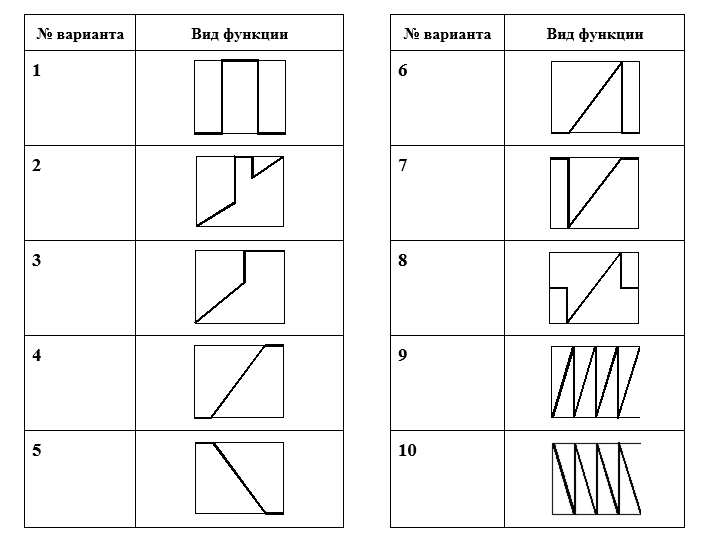

Импорт необходимых библиотек

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from typing import Any, Dict

1. Считать цветное rgb изображение


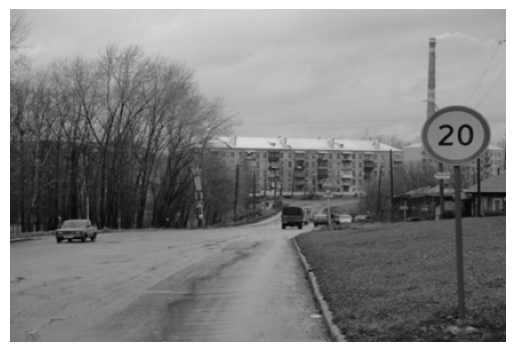

In [5]:
image = cv2.cvtColor(cv2.imread("SOI.png"), cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)

2. Преобразовать изображение в градации серого


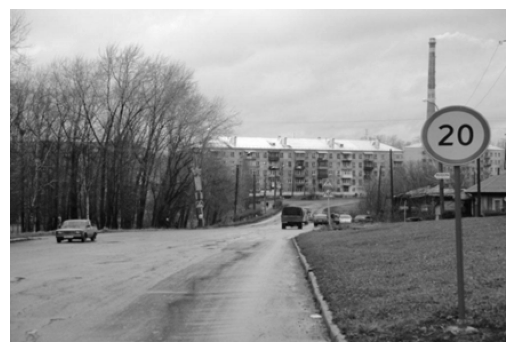

In [6]:
gray = image[:,:,0]*0.2126 + image[:,:,1]*0.7152 + image[:,:,2]*0.0722
plt.axis("off")
plt.imshow(gray, cmap='gray')

3. Написать функцию реализации препарирования изображения


In [7]:
def image_preparation(gray, func):
    new_image = np.vectorize(func)(gray)
    return new_image.astype(np.uint8)

4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением


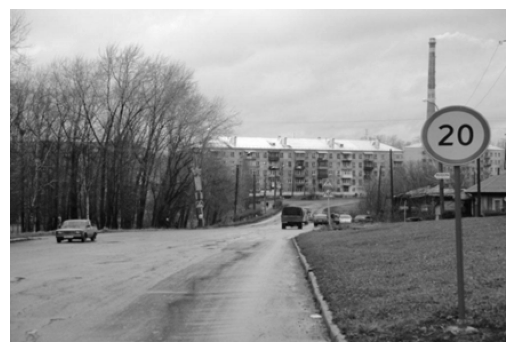

In [8]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

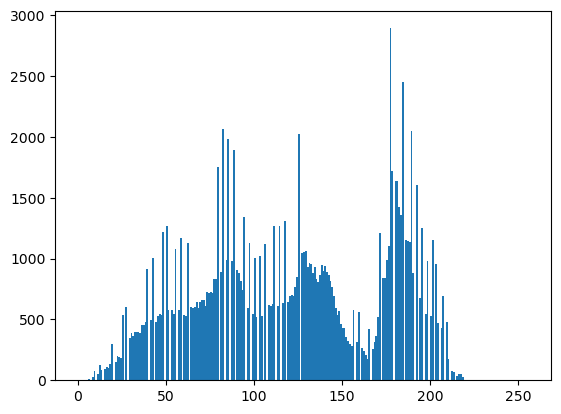

In [9]:
plt.hist(gray.flatten(),256,[0,256]) 
plt.show() 

In [10]:
def get_threshold_image(gray, threshold):
     return np.vectorize(lambda x: 255 if x > threshold else 0)(gray)

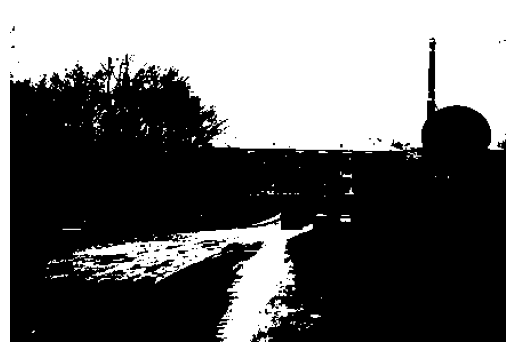

In [11]:
threshold_image = get_threshold_image(gray, threshold=140)
plt.axis("off")
plt.imshow(threshold_image, cmap='gray')

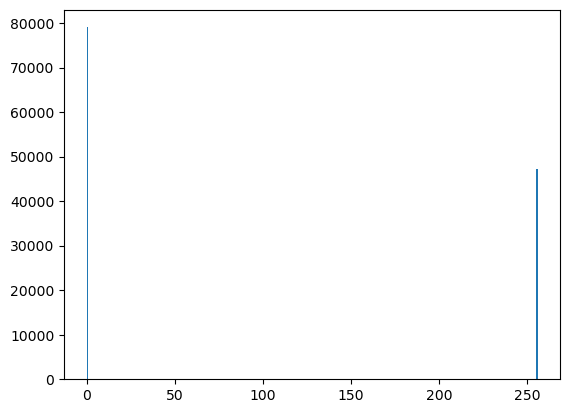

In [12]:
plt.hist(threshold_image.flatten(),256,[0,256]) 
plt.show() 

5. Сделать пороговую обработку методом Otsu (Функция OpenCV)


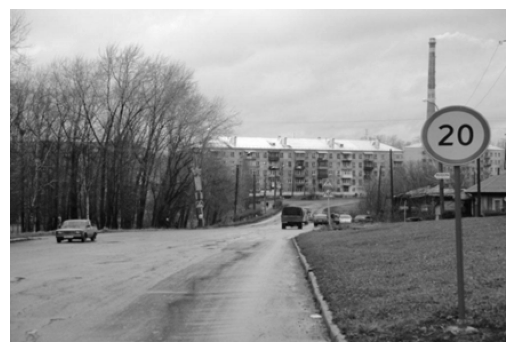

In [13]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

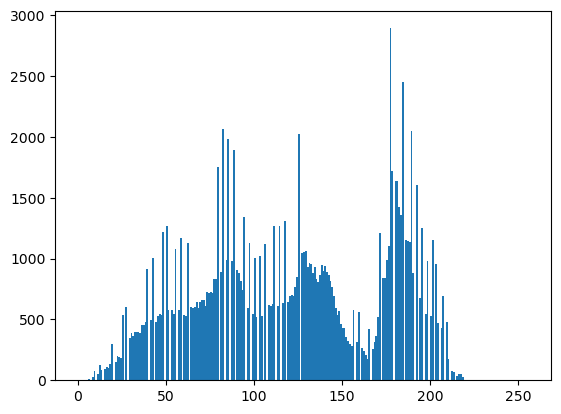

In [14]:
plt.hist(gray.flatten(),256,[0,256]) 
plt.show() 

In [15]:
gray = gray.astype("uint8")
opencv_threshold, opencv_threshold_image = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

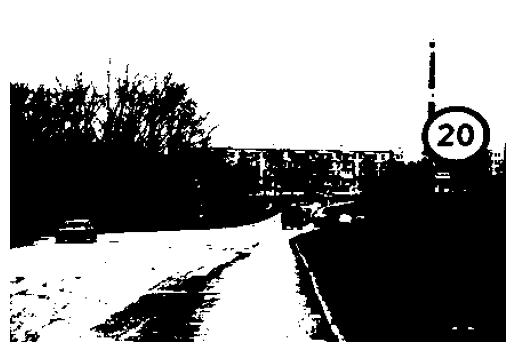

In [16]:
plt.axis("off")
plt.imshow(opencv_threshold_image, cmap='gray')

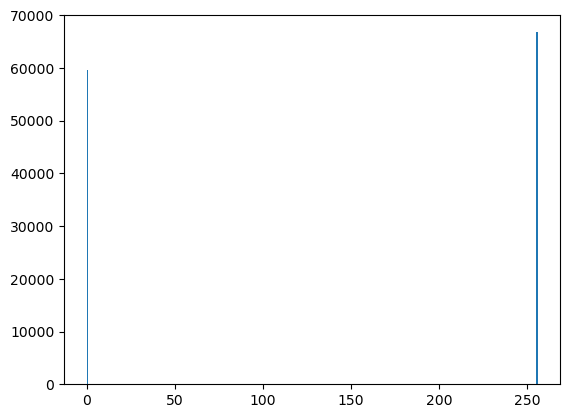

In [17]:
plt.hist(opencv_threshold_image.flatten(),256,[0,256]) 
plt.show() 

6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей


In [18]:
def linear_contrast(gray: np.ndarray) -> Dict[str, Any]:
    results = dict()

    x_min = gray.flatten().min()
    x_max = gray.flatten().max()

    y_min = 0
    y_max = 255
    a = (y_max - y_min) / (x_max - x_min)
    b = (y_min * x_max - y_max * x_min) / (x_max - x_min)

    result_image = np.vectorize(lambda x: a * x + b)(gray)
    result_image = result_image.astype(np.uint8)

    results["original_range"] = (x_min, x_max)
    results["original_image"] = gray.copy()
    results["a"] = a
    results["b"] = b
    results["result_range"] = (result_image.flatten().min(), result_image.flatten().max())
    results["result_image"] = result_image.copy()

    return results

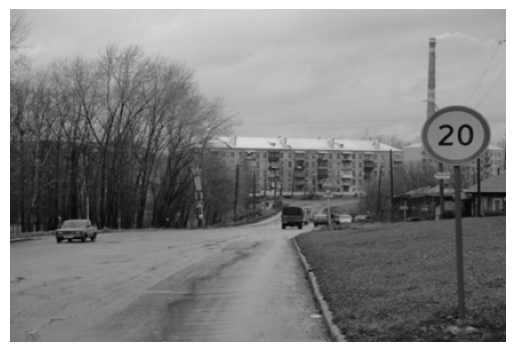

In [22]:
gray_man = cv2.cvtColor(cv2.imread("SOI.png"), cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(gray_man)

In [23]:
linear_contrast_results = linear_contrast(gray_man)

In [24]:
print(f"Линейное преобразование для данного изображения: y = {linear_contrast_results['a']} * x {linear_contrast_results['b']}.")

Линейное преобразование для данного изображения: y = 1.1643835616438356 * x -1.1643835616438356.


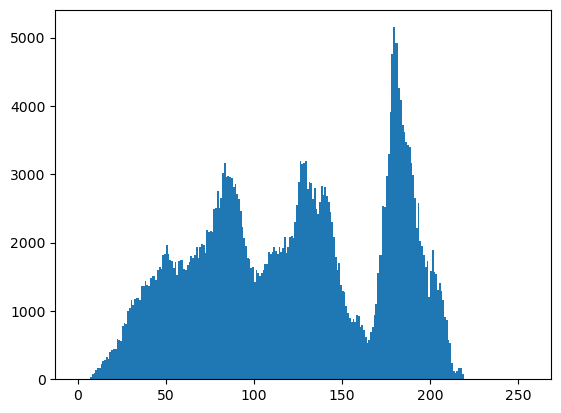

In [25]:
plt.hist(linear_contrast_results['original_image'].flatten(),256,[0,256]) 
plt.show() 

In [26]:
linear_contrast_results['original_range']

(1, 220)

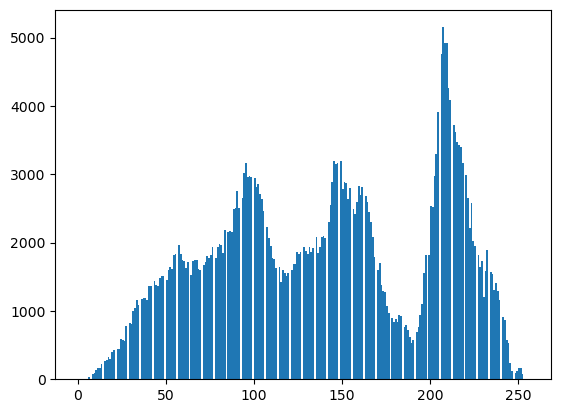

In [27]:
plt.hist(linear_contrast_results['result_image'].flatten(),256,[0,256]) 
plt.show() 

In [28]:
linear_contrast_results['result_range']

(0, 255)

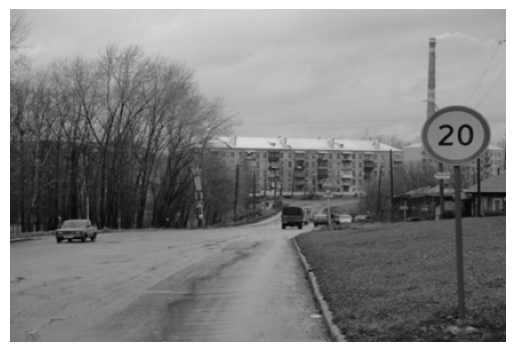

In [29]:
plt.axis("off")
plt.imshow(linear_contrast_results['original_image'])

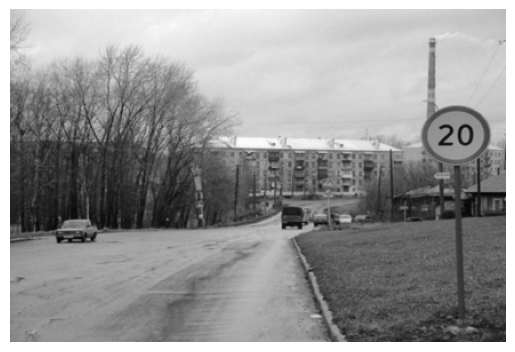

In [30]:
plt.axis("off")
plt.imshow(linear_contrast_results['result_image'])

7. Сделать эквализацию гистограммы изображения


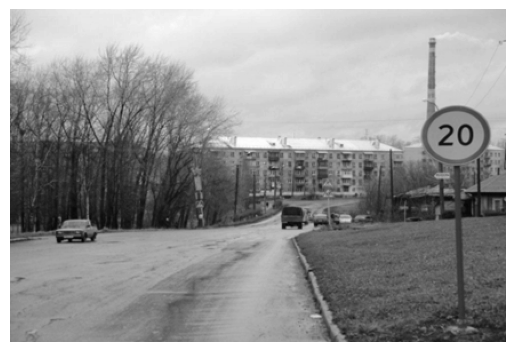

In [31]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

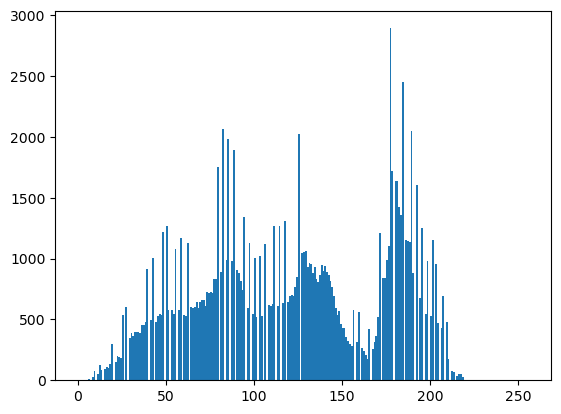

In [32]:
plt.hist(gray.flatten(),256,[0,256]) 
plt.show() 

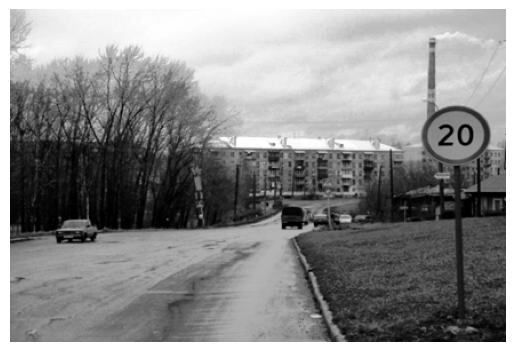

In [33]:
def image_equalization(gray):
    h, w = gray.shape
    image_hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = image_hist.cumsum()
    result_cdf = (cdf - cdf[0]) * 255 / (h * w - 1)
    result_cdf = result_cdf.astype(np.uint8)
    result_image = result_cdf[gray]
    return result_image

plt.axis("off")
plt.imshow(image_equalization(gray), cmap='gray')

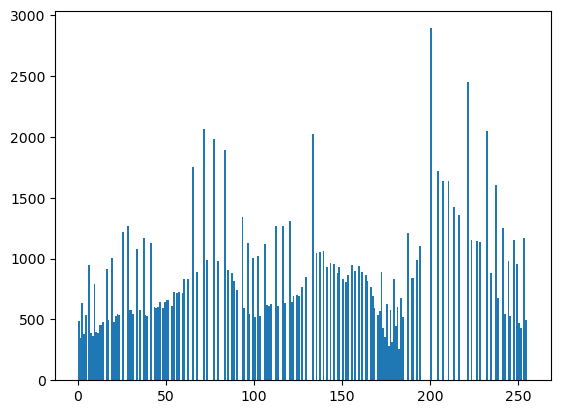

In [34]:
plt.hist(image_equalization(gray).flatten(),256,[0,256]) 
plt.show() 

8. Сделать эквализацию методом CLAHE (Функция OpenCV)


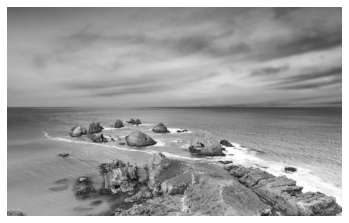

In [29]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

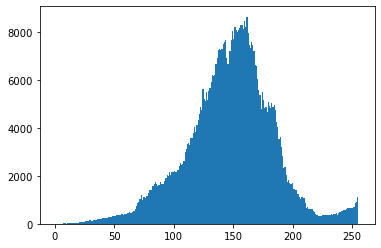

In [30]:
plt.hist(gray.flatten(),256,[0,256]) 
plt.show() 

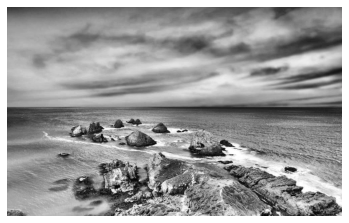

In [31]:
opencv_image_equal = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(gray)
plt.axis("off")
plt.imshow(opencv_image_equal, cmap='gray')

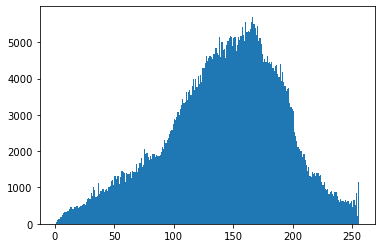

In [32]:
plt.hist(opencv_image_equal.flatten(),256,[0,256]) 
plt.show() 

9. Осуществить препарирование изображения с заданной препарирующей функцией

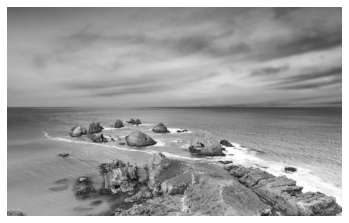

In [33]:
plt.axis("off")
plt.imshow(gray, cmap='gray')

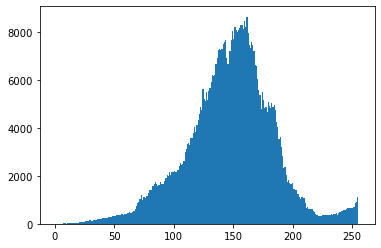

In [34]:
plt.hist(gray.flatten(),256,[0,256]) 
plt.show() 

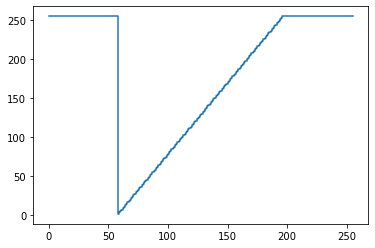

In [35]:
def prep_func(x, a = 255, b = 58, c = 197):
    if b < x < c:
        return a*(x-b)/(c-b)        
    else:
        return a
plt.step(range(0, 256), [prep_func(x) for x in range(0, 256)])

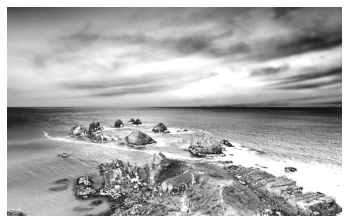

In [36]:
prep_image = image_preparation(gray, prep_func)
plt.axis("off")
plt.imshow(prep_image, cmap='gray')

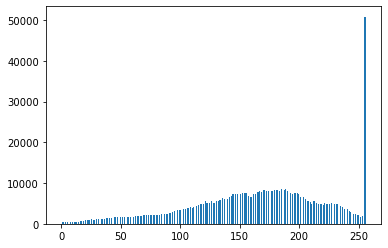

In [37]:
plt.hist(prep_image.flatten(),256,[0,256]) 
plt.show() 